## Transfer learning:

take weights and biases... and change (few) last layer(s)

use pre-trained models into solving another problem

In [1]:
import numpy as np
import cv2

import PIL.Image as Image
import os

import matplotlib.pylab as plt

import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

# animals + other: classification

In [3]:
IMAGE_SHAPE = (224, 224)
classifier = tf.keras.Sequential([
    hub.KerasLayer("https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/4", input_shape=IMAGE_SHAPE+(3,))
])

2023-01-29 20:43:48.739016: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


Instructions for updating:
Lambda fuctions will be no more assumed to be used in the statement where they are used, or at least in the same block. https://github.com/tensorflow/tensorflow/issues/56089


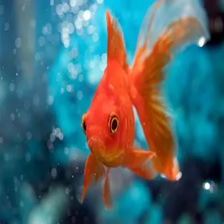

In [5]:
gold_fish = Image.open("th.webp").resize(IMAGE_SHAPE)
gold_fish

In [6]:
#255 is color
gold_fish = np.array(gold_fish)/255
gold_fish.shape

(224, 224, 3)

In [7]:
#new axis for new D, prediciton accept > 1 img as input
gold_fish[np.newaxis, ...].shape

(1, 224, 224, 3)

In [8]:
#predict for 1000 classes, class 0 has 0.27...
result = classifier.predict(gold_fish[np.newaxis, ...])
result

1/1 [==============================] - 0s 417ms/step


array([[ 0.27364352,  1.4543422 ,  9.528572  , ..., -2.667808  ,
        -0.21913442, -0.40017325]], dtype=float32)

In [13]:
#class that has max value
pred_label_index = np.argmax(result)
pred_label_index

2

In [14]:
with open("ImageNetLabels.txt", "r") as f:
    img_labels = f.read().splitlines()
img_labels[:5]

['background', 'tench', 'goldfish', 'great white shark', 'tiger shark']

In [15]:
img_labels[pred_label_index]

'goldfish'

# Flower ds

dataset_url = "https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = tf.keras.utils.get_file('flower_photos', origin=dataset_url,  cache_dir='.', untar=True)



cache_dir indicates where to download data. I specified . which means current directory



untar true will unzip it

In [48]:
import pathlib

data_dir = pathlib.Path("/home/ines/Downloads/flower_photos(1)/flower_photos")
data_dir

PosixPath('/home/ines/Downloads/flower_photos(1)/flower_photos')

In [49]:
directories_with_jpgs = [item for item in data_dir.iterdir() if item.is_dir() and len(list(item.glob("*.jpg")))]
print(directories_with_jpgs)

[PosixPath('/home/ines/Downloads/flower_photos(1)/flower_photos/roses'), PosixPath('/home/ines/Downloads/flower_photos(1)/flower_photos/sunflowers'), PosixPath('/home/ines/Downloads/flower_photos(1)/flower_photos/tulips'), PosixPath('/home/ines/Downloads/flower_photos(1)/flower_photos/daisy'), PosixPath('/home/ines/Downloads/flower_photos(1)/flower_photos/dandelion')]


In [51]:
list(data_dir.glob("*/*.jpg"))[:9]

[PosixPath('/home/ines/Downloads/flower_photos(1)/flower_photos/roses/14810868100_87eb739f26_m.jpg'),
 PosixPath('/home/ines/Downloads/flower_photos(1)/flower_photos/roses/1446090416_f0cad5fde4.jpg'),
 PosixPath('/home/ines/Downloads/flower_photos(1)/flower_photos/roses/15319767030_e6c5602a77_m.jpg'),
 PosixPath('/home/ines/Downloads/flower_photos(1)/flower_photos/roses/15032112248_30c5284e54_n.jpg'),
 PosixPath('/home/ines/Downloads/flower_photos(1)/flower_photos/roses/7211616670_2d49ecb3a5_m.jpg'),
 PosixPath('/home/ines/Downloads/flower_photos(1)/flower_photos/roses/15674450867_0ced942941_n.jpg'),
 PosixPath('/home/ines/Downloads/flower_photos(1)/flower_photos/roses/17158274118_00ec99a23c.jpg'),
 PosixPath('/home/ines/Downloads/flower_photos(1)/flower_photos/roses/14019883858_e5d2a0ec10_n.jpg'),
 PosixPath('/home/ines/Downloads/flower_photos(1)/flower_photos/roses/8035908422_87220425d2_n.jpg')]

In [52]:
img_count = len(list(data_dir.glob("*/*.jpg")))
print(img_count)

3670


In [53]:
roses = list(data_dir.glob('roses/*'))
roses[:5]

[PosixPath('/home/ines/Downloads/flower_photos(1)/flower_photos/roses/14810868100_87eb739f26_m.jpg'),
 PosixPath('/home/ines/Downloads/flower_photos(1)/flower_photos/roses/1446090416_f0cad5fde4.jpg'),
 PosixPath('/home/ines/Downloads/flower_photos(1)/flower_photos/roses/15319767030_e6c5602a77_m.jpg'),
 PosixPath('/home/ines/Downloads/flower_photos(1)/flower_photos/roses/15032112248_30c5284e54_n.jpg'),
 PosixPath('/home/ines/Downloads/flower_photos(1)/flower_photos/roses/7211616670_2d49ecb3a5_m.jpg')]

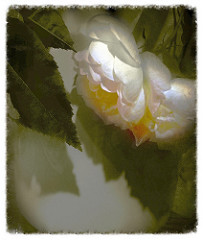

In [56]:
 Image.open(str(roses[9]))

In [57]:
flowers_imgs_dict = {
    'roses': list(data_dir.glob('roses/*')),
    'daisy': list(data_dir.glob('daisy/*')),
    'dandelion': list(data_dir.glob('dandelion/*')),
    'sunflowers': list(data_dir.glob('sunflowers/*')),
    'tulips': list(data_dir.glob('tulips/*')),
}

In [58]:
flowers_labels_dict = {
    "roses":0,
    "daisy":1,
    "dandelion":2,
    "sunflowers":3,
    "tulips":4,
}

In [59]:
str(flowers_imgs_dict["roses"][0])

'/home/ines/Downloads/flower_photos(1)/flower_photos/roses/14810868100_87eb739f26_m.jpg'

In [60]:
flower_img = cv2.imread(str(flowers_imgs_dict["roses"][0]))

In [61]:
flower_img.shape

(240, 178, 3)

In [63]:
cv2.resize(flower_img, IMAGE_SHAPE).shape

(224, 224, 3)

In [66]:
X, y = [], []

for flower_name, imgs in flowers_imgs_dict.items():
    for img in imgs:
        flower_img = cv2.imread(str(img))
        resized_img = cv2.resize(flower_img, IMAGE_SHAPE)
        X.append(resized_img)
        y.append(flowers_labels_dict[flower_name])

In [68]:
X = np.array(X)
y = np.array(y)

In [74]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=45)

In [75]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

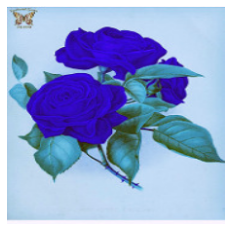

In [76]:
plt.axis("off")
plt.imshow(X[0])

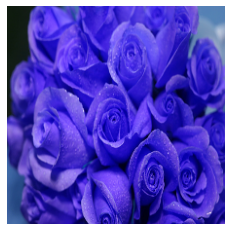

In [77]:
plt.axis("off")
plt.imshow(X[1])

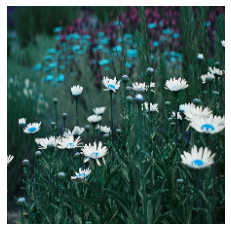

In [84]:
plt.axis("off")
plt.imshow(X[830])

In [86]:
pred_flower = classifier.predict(np.array([X[0], X[1], X[830]]))

1/1 [==============================] - 0s 32ms/step


In [87]:
pred_flower = np.argmax(pred_flower, axis = 1)
pred_flower

array([722, 795, 795])

In [88]:
img_labels[722]

'pillow'

# Use transfer learning

In [89]:
#feature vector doesnt include softmax layer
#trainable = False => all layers have fixed weights

feature_extractor_model = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4"

pretrained_model_without_top_layer = hub.KerasLayer(
    feature_extractor_model, input_shape=(224, 224, 3), trainable=False)

In [90]:
num_of_flowers = 5

model = tf.keras.Sequential([
  pretrained_model_without_top_layer,
    #last layer
  tf.keras.layers.Dense(num_of_flowers)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [91]:
model.compile(
  optimizer="adam",
  loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

model.fit(X_train_scaled, y_train, epochs=5)

Epoch 1/5


2023-01-29 22:13:19.485370: W tensorflow/tsl/framework/cpu_allocator_impl.cc:82] Allocation of 1657012224 exceeds 10% of free system memory.


86/86 [==============================] - 25s 267ms/step - loss: 0.8119 - acc: 0.7031
Epoch 2/5
86/86 [==============================] - 23s 271ms/step - loss: 0.4167 - acc: 0.8594
Epoch 3/5
86/86 [==============================] - 23s 270ms/step - loss: 0.3251 - acc: 0.8943
Epoch 4/5
86/86 [==============================] - 22s 255ms/step - loss: 0.2712 - acc: 0.9179
Epoch 5/5
86/86 [==============================] - 21s 242ms/step - loss: 0.2346 - acc: 0.9342


#### with transfer learning, accuracy is higher, doesnt require many epochs and it doesnt take a lot of GPU/CPU computational power

In [92]:
model.evaluate(X_test_scaled, y_test)

29/29 [==============================] - 8s 252ms/step - loss: 0.3747 - acc: 0.8638


[0.3747091293334961, 0.8638344407081604]